# Micro Credit Project

- A Microfinance Institution (MFI) is an organization that offers financial services to low income populations. MFS becomes very useful when targeting especially the unbanked poor families living in remote areas with not much sources of income. The Microfinance services (MFS) provided by MFI are Group Loans, Agricultural Loans, Individual Business Loans and so on. 


- Our client is a fixed wireless telecommunications network provider. They have launched various products and have developed its business and organization based on the budget operator model, offering better products at Lower Prices to all value conscious customers through a strategy of disruptive innovation that focuses on the subscriber. 


- They are collaborating with an MFI to provide micro-credit on mobile balances to be paid back in 5 days. The Consumer is believed to be defaulter if he deviates from the path of paying back the loaned amount within the time duration of 5 days. For the loan amount of 5 (in Indonesian Rupiah), payback amount should be6(in Indonesian Rupiah), while, for the loan amount of 10(in Indonesian Rupiah), the payback amount should be 12(in Indonesian Rupiah). 


- We have to build a model which can be used to predict in terms of a probability for each loan transaction, whether the customer will be paying back the loaned amount within 5 days of insurance of loan. In this case, Label ‘1’ indicates that the loan has been payed i.e. Non- defaulter, while, Label ‘0’ indicates that the loan has not been payed i.e. defaulter.   

In [1]:
#Importing the libraries
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import joblib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from scipy.stats import zscore
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import power_transform
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import OrdinalEncoder
import joblib
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing the dataset
df=pd.read_csv('Data file.csv')
df

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,2016-06-17
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,2016-06-12
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,2016-07-29
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,2016-07-25


In [3]:
#I used this line of code to see all the columns of the dataset

pd.set_option('display.max_columns', None)

In [4]:
df

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,3,2.0,10404.0,3178.0,91.81,3,2,10404,3178.0,91.81,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,2016-06-17
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,4,1.0,3092.0,773.0,161.30,6,2,4038,773.0,111.80,0.0,0.0,0,0,3,18,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,2016-06-12
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,5,8.0,9334.0,1539.0,51.13,11,5,18592,1539.0,47.13,0.0,0.0,0,0,4,42,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,2016-07-29
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,5,4.0,12154.0,773.0,164.00,6,4,17941,2410.5,100.00,0.0,0.0,1,0,2,18,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,2016-07-25


In [5]:
df.shape   #checking te data dimensiion

(209593, 37)

In [6]:
df.columns   #checking the columns of the dataset

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

In [7]:
df.dtypes   #checking the data types of each column

Unnamed: 0                int64
label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_

In [8]:
#checking the null values in the dataset
df.isnull().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

- We can see that their is no null values in the dataset.

### Visualization of the data

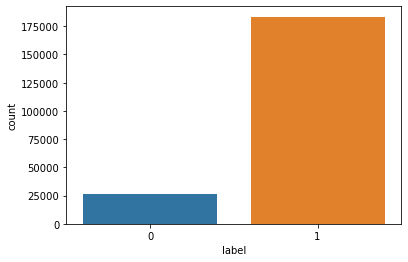

1    183431
0     26162
Name: label, dtype: int64

In [9]:
sns.countplot(x='label',data=df)
plt.show()
df['label'].value_counts()

- As we can see from the above graph and the stats, 183431 are non-defaulter that means they have payed the loan back within specified period of time.

<AxesSubplot:xlabel='rental90', ylabel='Density'>

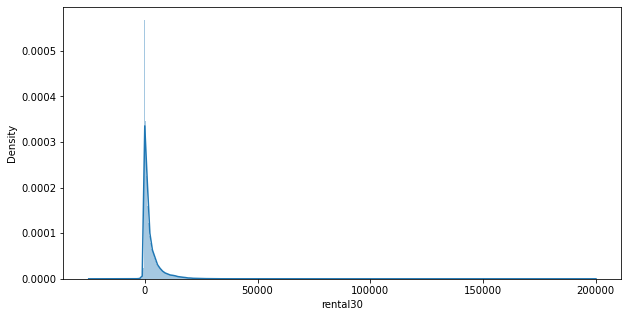

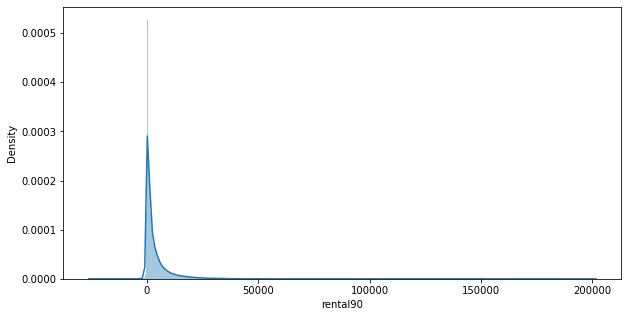

In [10]:
plt.figure(figsize=(10, 5))
sns.distplot(df['rental30'], bins=500)

plt.figure(figsize=(10, 5))
sns.distplot(df['rental90'], bins=500)

- From the above plot we can see that majority of the people have very less(nearly zero) account balance from last 30 days and 90 days.

<AxesSubplot:xlabel='label', ylabel='daily_decr30'>

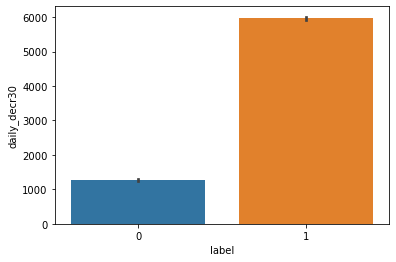

In [11]:
sns.barplot(x='label', y='daily_decr30', data=df)

- from the above graph we can observe that average daily spent in last 30 of a 'non-defaulter' is more than a 'defaulter'.

- For a non-defaulter the average spent in 30 days is approx 6000 while it is only approx 1500 for a defaulter.

<AxesSubplot:xlabel='label', ylabel='daily_decr90'>

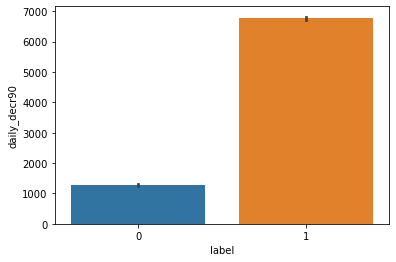

In [12]:
sns.barplot(x='label', y='daily_decr90', data=df)

- From the above graph we can observe that average daily spent in last 90 of a 'non-defaulter' is more than a 'defaulter'.

- For a non-defaulter the average spent in 90 days is approx 7000 while it is only approx 1500 for a defaulter.

<AxesSubplot:xlabel='cnt_ma_rech90', ylabel='Density'>

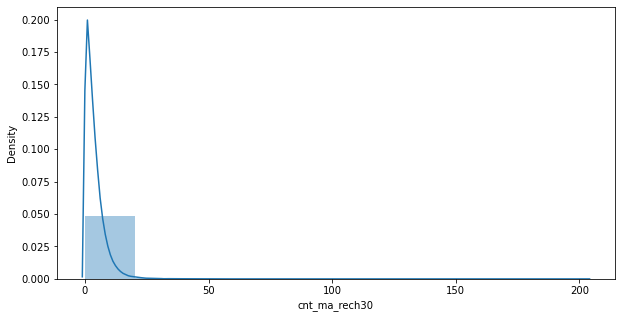

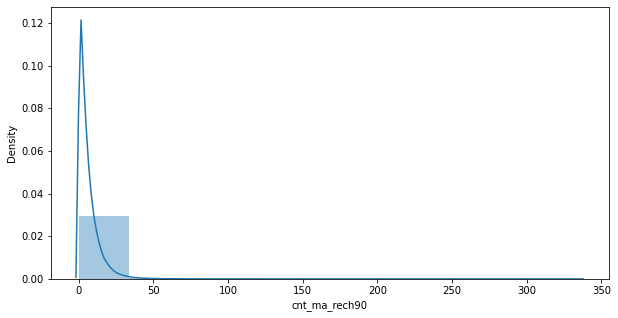

In [13]:
plt.figure(figsize=(10, 5))
sns.distplot(df['cnt_ma_rech30'], bins=10)


plt.figure(figsize=(10, 5))
sns.distplot(df['cnt_ma_rech90'], bins=10)

- We can observe from the above graph that majority of the people have recharged their account almost 20 times in the last 30 days and 90 days.

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

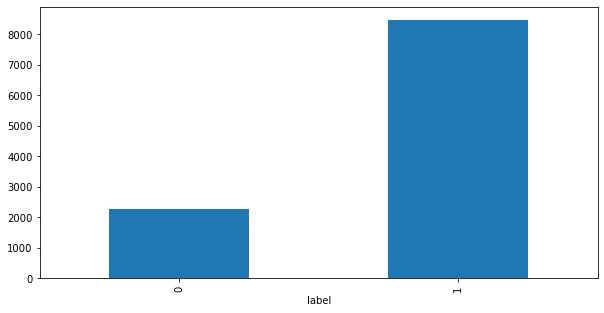

In [14]:
df.groupby('label')['sumamnt_ma_rech30'].mean().plot.bar(figsize=(10,5))
plt.xticks(rotation=90)

- From the above graph we can see that the non-defaulter made a total amount of recharge in main account over last 30 days is over 8000

- The defaulter made total amount of recharge in main account over last 30 days is approx 2500.

 

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

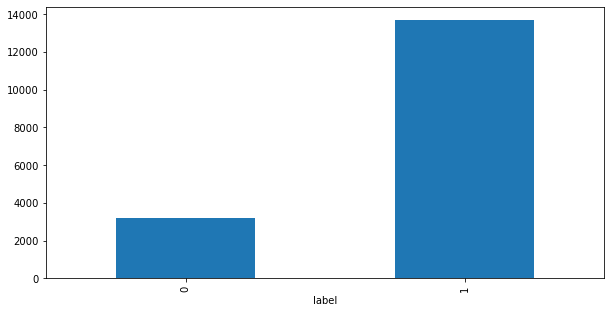

In [15]:

df.groupby('label')['sumamnt_ma_rech90'].mean().plot.bar(figsize=(10,5))
plt.xticks(rotation=90)

- From the above graph we can see that the non-defaulter made a total amount of recharge in main account over last 90 days is almost 14000.

- The defaulter made total amount of recharge in main account over last 90 days is approx 2500.

In [16]:
df['cnt_loans30'].value_counts()

1     83432
2     42665
3     27050
4     17499
5     11673
6      7773
7      5041
8      3384
0      3259
9      2273
10     1571
11     1143
12      793
13      547
14      383
15      270
16      213
17      164
18       98
19       77
20       54
21       45
22       42
23       38
25       19
26       17
27       15
24       13
29        9
31        8
28        7
30        4
32        4
33        3
38        2
41        1
44        1
36        1
35        1
50        1
Name: cnt_loans30, dtype: int64

- From the above stats we can observe that 83432 times people take the loan 1 time in last 30 days.

- we can also observe that as the number of times loan taken are increasing, the number of people are decreasing.

<AxesSubplot:xlabel='amnt_loans30', ylabel='Density'>

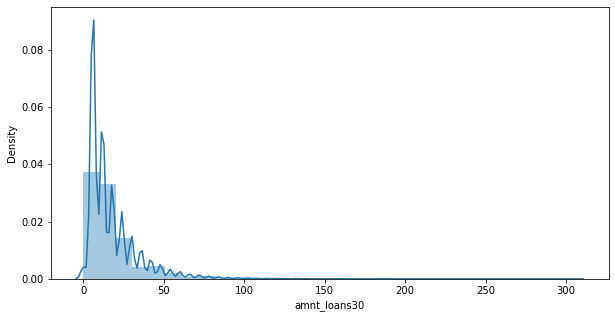

In [17]:
plt.figure(figsize=(10, 5))
sns.distplot(df['amnt_loans30'], bins=30)

- As we can observe from the above graph that majority of the people have taken the loan of less than Rs50 in the last 30 days.

<AxesSubplot:xlabel='cnt_loans90', ylabel='Density'>

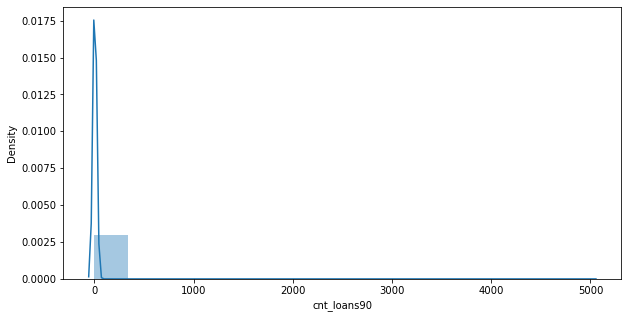

In [18]:
plt.figure(figsize=(10, 5))
sns.distplot(df['cnt_loans90'], bins=15)

- From the above graph we can observe that maximum number no of loans taken by the user are approximately 250. 

<AxesSubplot:xlabel='amnt_loans90', ylabel='Density'>

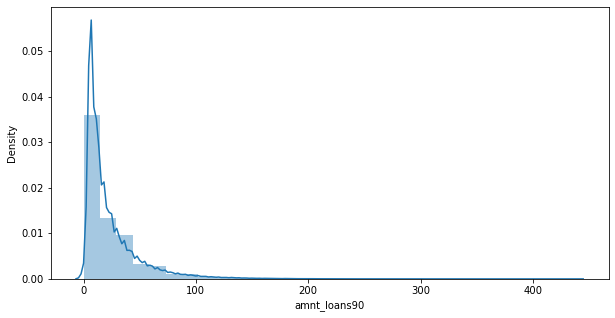

In [19]:
plt.figure(figsize=(10, 5))
sns.distplot(df['amnt_loans90'], bins=30)

- As we can observe that from the above graph that majority of te people had take approximately 0 to Rs50 amount of loan in past 90 days

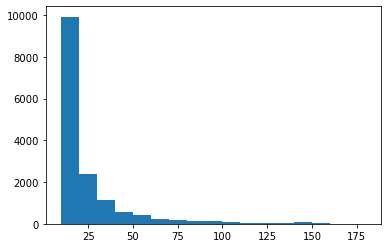

In [20]:
plt.hist(df['payback30'], bins=[10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180])
plt.show()

- We can observe that maximun number of people had payed back their loan before 25 days in last 30 days.

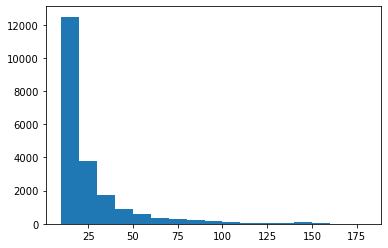

In [21]:
plt.hist(df['payback90'],  bins=[10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180])
plt.show()

- we can observe that maximum number of people had payed their loan back before 30 days in last 90 days.

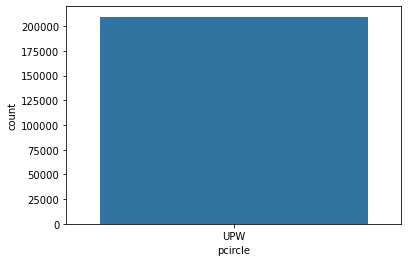

In [22]:
sns.countplot(x='pcircle',data=df)
plt.show()

- As we can see their is only 1 telecom circle that is UPW.

Text(0.5, 1.0, 'Daily amount spent in last 30 days')

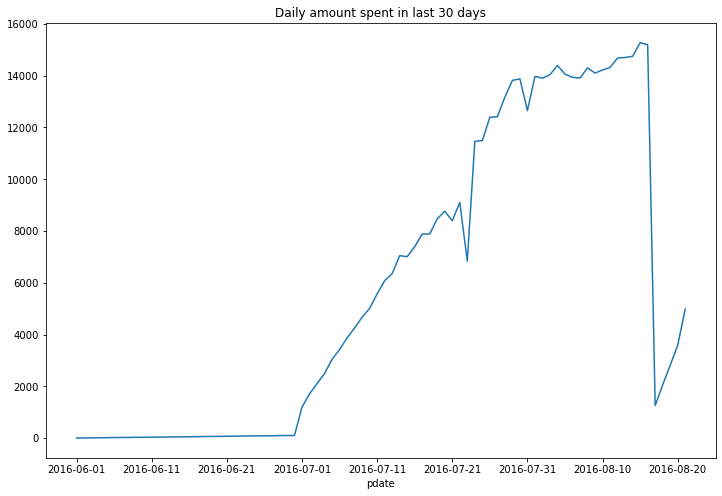

In [23]:
a=df.groupby('pdate').mean()
plt.figure(figsize=(12,8))
a['daily_decr30'].plot()
plt.title('Daily amount spent in last 30 days')

- As we can observe from 21-07-2016 to 20-08-2016 the daily amount spent is very high in last 30 days.

Text(0.5, 1.0, 'Daily amount spent in last 90 days')

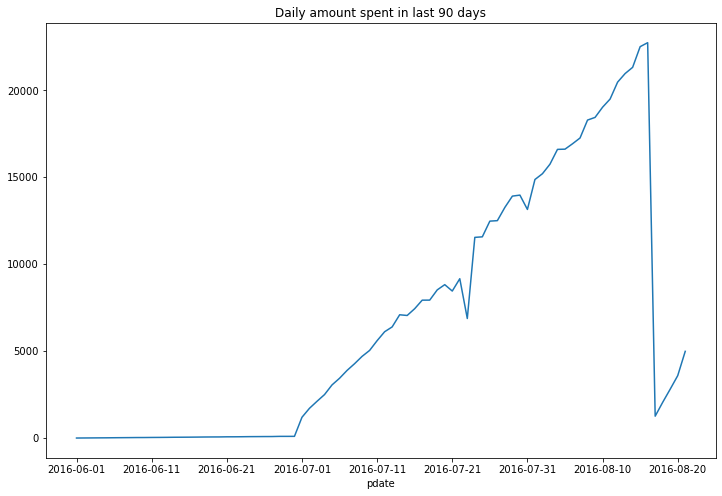

In [24]:
a=df.groupby('pdate').mean()
plt.figure(figsize=(12,8))
a['daily_decr90'].plot()
plt.title('Daily amount spent in last 90 days')

- As we can observe from 21-07-2016 to 20-08-2016 the daily amount spent is very high in last 90 days.

Text(0.5, 1.0, 'number of times main account recharge in last 90 days')

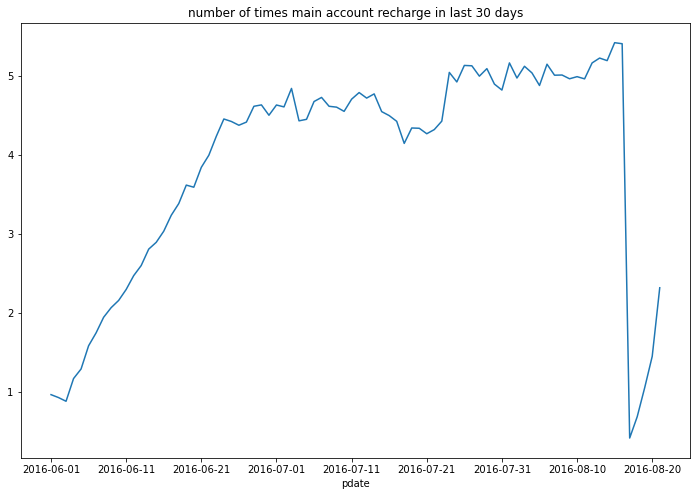

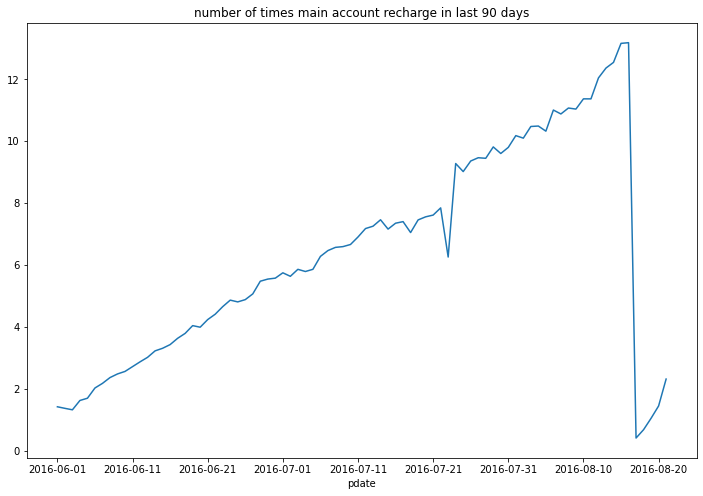

In [25]:
a=df.groupby('pdate').mean()
plt.figure(figsize=(12,8))
a['cnt_ma_rech30'].plot()
plt.title('number of times main account recharge in last 30 days')



a=df.groupby('pdate').mean()
plt.figure(figsize=(12,8))
a['cnt_ma_rech90'].plot()
plt.title('number of times main account recharge in last 90 days')

- From the above 2 graphs we can see that after 21-06-2016 the number of times the main account got recharged is increasing in last 30 and 90 days.

Text(0.5, 1.0, 'Number of loans taken by user in last 90 days')

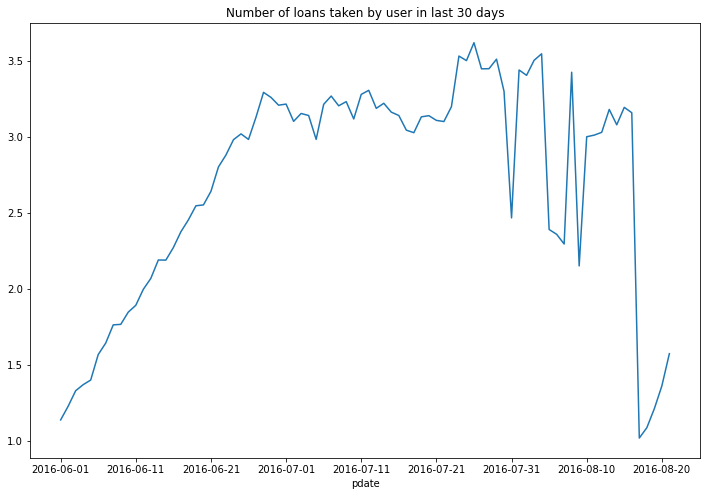

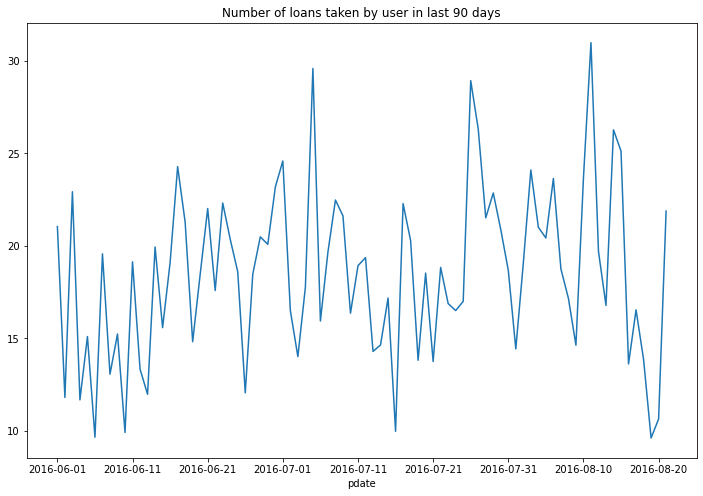

In [26]:
a=df.groupby('pdate').mean()
plt.figure(figsize=(12,8))
a['cnt_loans30'].plot()
plt.title('Number of loans taken by user in last 30 days')



a=df.groupby('pdate').mean()
plt.figure(figsize=(12,8))
a['cnt_loans90'].plot()
plt.title('Number of loans taken by user in last 90 days')

- As we can observe in last 30 days from 01-06-2016, the number of loans taken by user are increasing.

- We can also observe that in last 90 days the frequency of number of loans taken by user from 01-06-2016 is fluctuating. So it keeps increasing and decreasing.

array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'label'}>,
        <AxesSubplot:title={'center':'aon'}>,
        <AxesSubplot:title={'center':'daily_decr30'}>,
        <AxesSubplot:title={'center':'daily_decr90'}>,
        <AxesSubplot:title={'center':'rental30'}>,
        <AxesSubplot:title={'center':'rental90'}>],
       [<AxesSubplot:title={'center':'last_rech_date_ma'}>,
        <AxesSubplot:title={'center':'last_rech_date_da'}>,
        <AxesSubplot:title={'center':'last_rech_amt_ma'}>,
        <AxesSubplot:title={'center':'cnt_ma_rech30'}>,
        <AxesSubplot:title={'center':'fr_ma_rech30'}>,
        <AxesSubplot:title={'center':'sumamnt_ma_rech30'}>,
        <AxesSubplot:title={'center':'medianamnt_ma_rech30'}>],
       [<AxesSubplot:title={'center':'medianmarechprebal30'}>,
        <AxesSubplot:title={'center':'cnt_ma_rech90'}>,
        <AxesSubplot:title={'center':'fr_ma_rech90'}>,
        <AxesSubplot:title={'center':'sumamnt_ma_rec

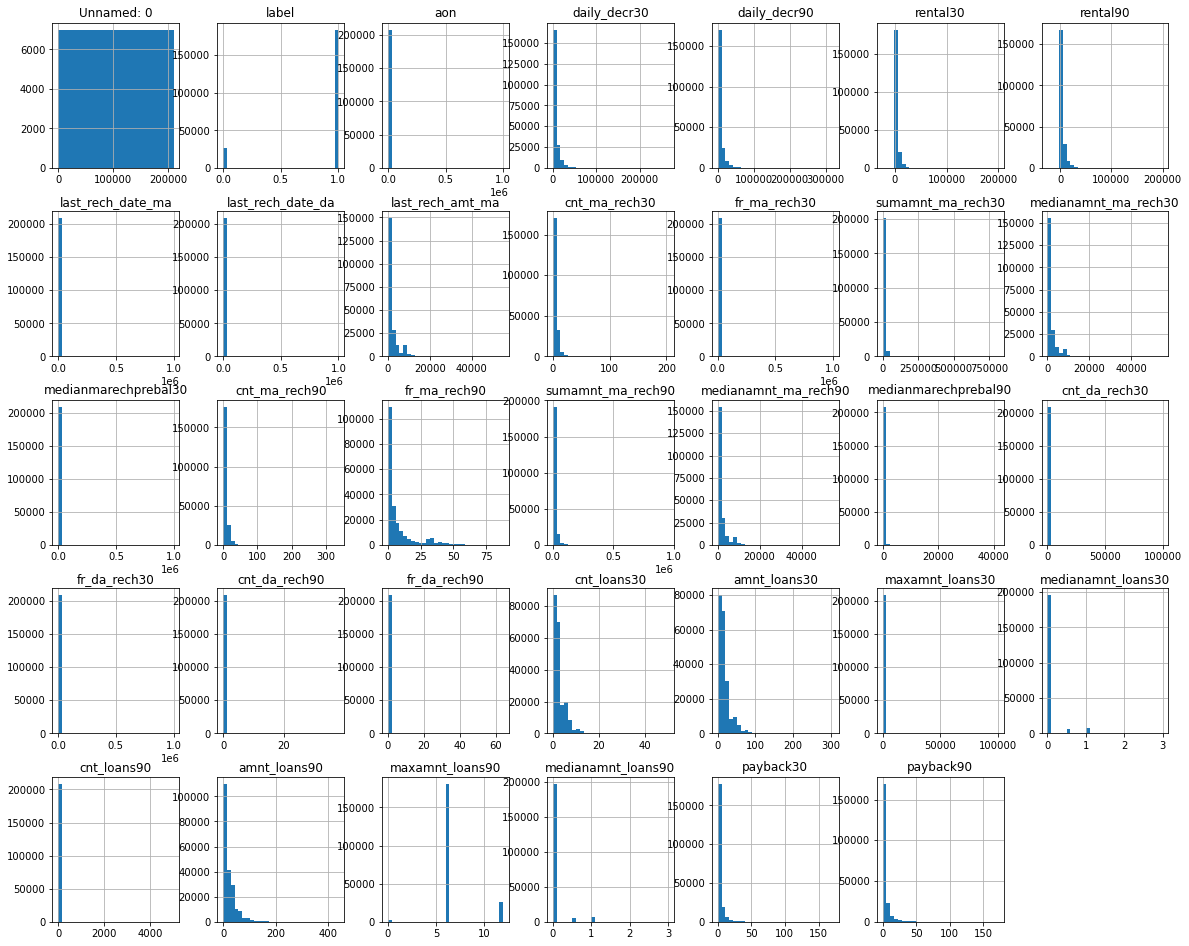

In [27]:
# Histogram to see the data distribution of all the columns
df.hist(figsize=(20,20), grid = True, layout = (6,7), bins = 30)

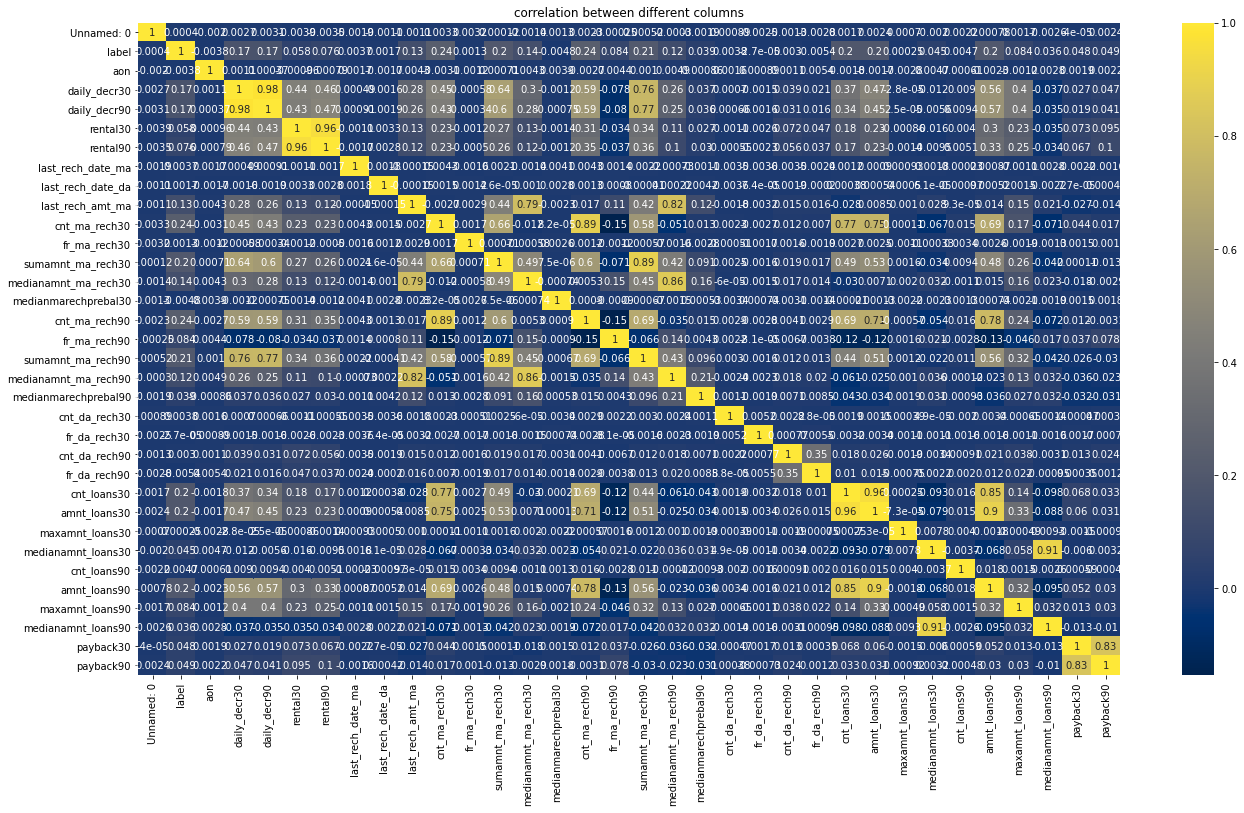

In [28]:
# Let's see the correlation between different columns.
corr_df= df.corr()

plt.figure(figsize=[22,12])
sns.heatmap(corr_df,cmap="cividis",annot=True)
plt.title('correlation between different columns')
plt.show()

In [29]:
#defining corr between every column to the target column

corr_matrix=df.corr()
corr_matrix['label'].sort_values(ascending=False)

label                   1.000000
cnt_ma_rech30           0.237331
cnt_ma_rech90           0.236392
sumamnt_ma_rech90       0.205793
sumamnt_ma_rech30       0.202828
amnt_loans90            0.199788
amnt_loans30            0.197272
cnt_loans30             0.196283
daily_decr30            0.168298
daily_decr90            0.166150
medianamnt_ma_rech30    0.141490
last_rech_amt_ma        0.131804
medianamnt_ma_rech90    0.120855
fr_ma_rech90            0.084385
maxamnt_loans90         0.084144
rental90                0.075521
rental30                0.058085
payback90               0.049183
payback30               0.048336
medianamnt_loans30      0.044589
medianmarechprebal90    0.039300
medianamnt_loans90      0.035747
cnt_loans90             0.004733
cnt_da_rech30           0.003827
last_rech_date_ma       0.003728
cnt_da_rech90           0.002999
last_rech_date_da       0.001711
fr_ma_rech30            0.001330
Unnamed: 0              0.000403
maxamnt_loans30         0.000248
fr_da_rech

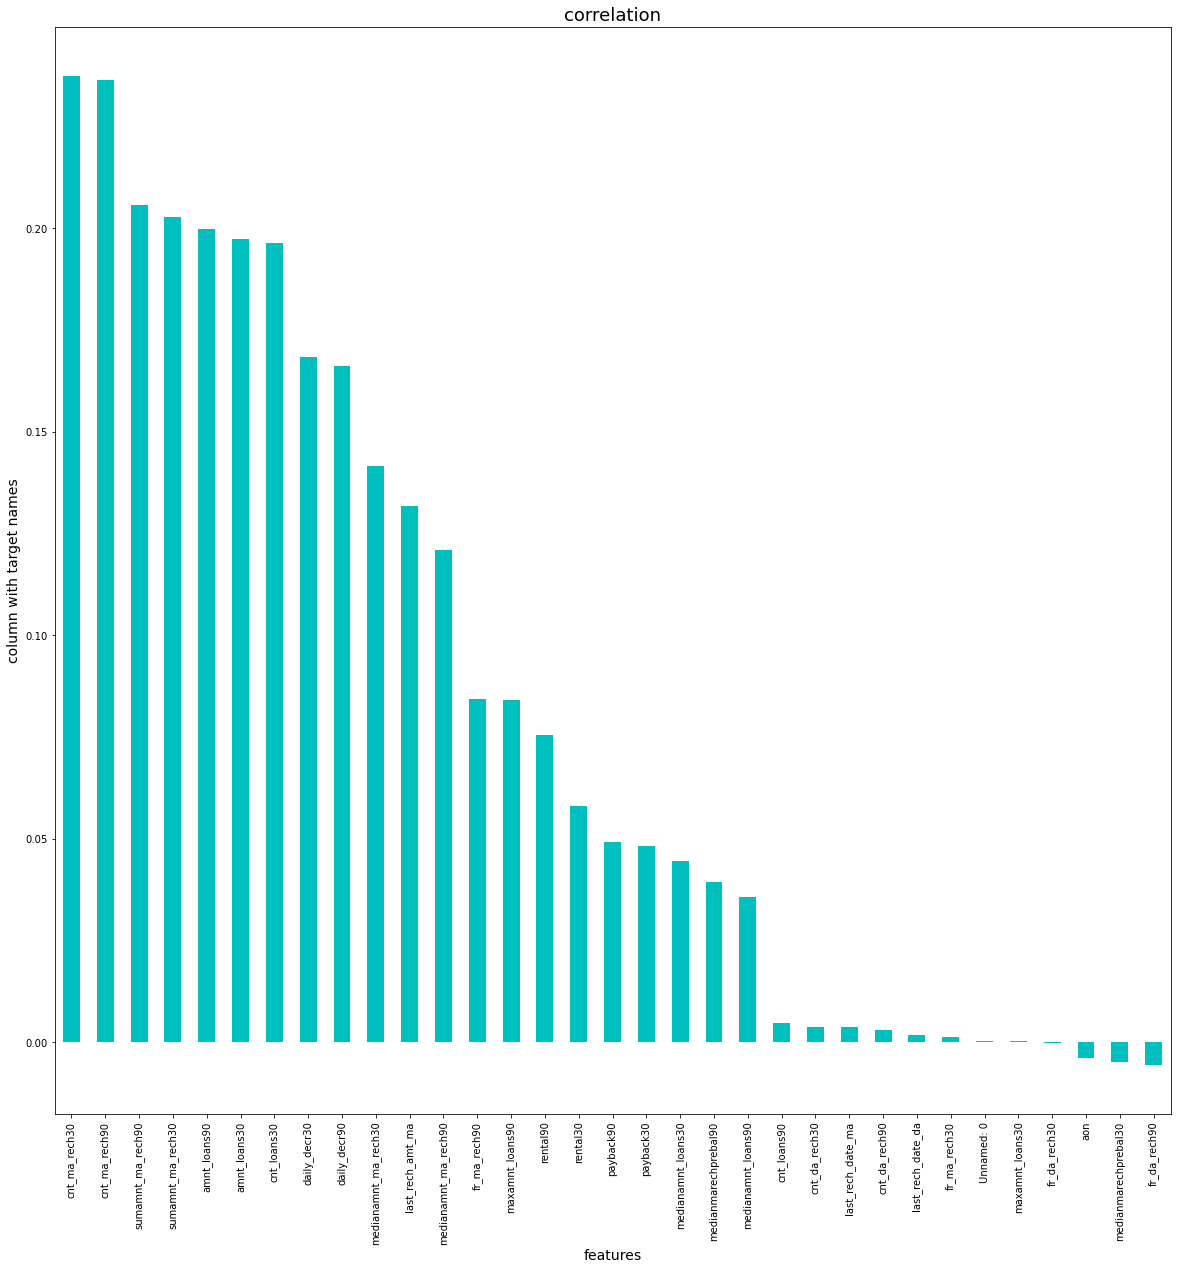

In [30]:
plt.figure(figsize=(20,20))
df.corr()['label'].sort_values(ascending=False).drop(['label']).plot(kind='bar', color='c')
plt.xlabel('features', fontsize=14)
plt.ylabel('column with target names', fontsize=14)
plt.title('correlation', fontsize=18)
plt.show()

- We can observe that from the above stats that 'Number of times main account got recharged in last 30 days' is the most positively correlated column with our target column that is 'label'.

- We can also observe that 'Frequency of data account recharged in last 90 days' is the most negatively correlated column with our target column that is 'label'.

### Data pre-processing

In [31]:
df

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,3,2.0,10404.0,3178.0,91.81,3,2,10404,3178.0,91.81,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,2016-06-17
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,4,1.0,3092.0,773.0,161.30,6,2,4038,773.0,111.80,0.0,0.0,0,0,3,18,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,2016-06-12
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,5,8.0,9334.0,1539.0,51.13,11,5,18592,1539.0,47.13,0.0,0.0,0,0,4,42,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,2016-07-29
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,5,4.0,12154.0,773.0,164.00,6,4,17941,2410.5,100.00,0.0,0.0,1,0,2,18,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,2016-07-25


In [32]:
#Handling the date column
df['pdate']= pd.to_datetime(df['pdate'])


df['pday']=df['pdate'].dt.day
df['pmonth']=df['pdate'].dt.month
df['year']=df['pdate'].dt.year

In [33]:
df

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate,pday,pmonth,year
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20,20,7,2016
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10,10,8,2016
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19,19,8,2016
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06,6,6,2016
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22,22,6,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,3,2.0,10404.0,3178.0,91.81,3,2,10404,3178.0,91.81,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,2016-06-17,17,6,2016
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,4,1.0,3092.0,773.0,161.30,6,2,4038,773.0,111.80,0.0,0.0,0,0,3,18,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,2016-06-12,12,6,2016
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,5,8.0,9334.0,1539.0,51.13,11,5,18592,1539.0,47.13,0.0,0.0,0,0,4,42,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,2016-07-29,29,7,2016
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,5,4.0,12154.0,773.0,164.00,6,4,17941,2410.5,100.00,0.0,0.0,1,0,2,18,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,2016-07-25,25,7,2016


- Now we can drop column 'pdate' as we make seperate date,month and year.

- we can also drop column 'unnamed: 0' as it is for no use.

- we can also drop 'msisdn' as the mobile number will be different for every customer.

- we can also drop 'pcircle' as their is only 1 value in that column.

In [34]:
df=df.drop(['Unnamed: 0','pdate','msisdn','pcircle'], axis=1)

In [35]:
df

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pday,pmonth,year
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,20,7,2016
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,10,8,2016
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,19,8,2016
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,6,6,2016
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,22,6,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,3,2.0,10404.0,3178.0,91.81,3,2,10404,3178.0,91.81,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,17,6,2016
209589,1,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,4,1.0,3092.0,773.0,161.30,6,2,4038,773.0,111.80,0.0,0.0,0,0,3,18,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,12,6,2016
209590,1,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,5,8.0,9334.0,1539.0,51.13,11,5,18592,1539.0,47.13,0.0,0.0,0,0,4,42,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,29,7,2016
209591,1,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,5,4.0,12154.0,773.0,164.00,6,4,17941,2410.5,100.00,0.0,0.0,1,0,2,18,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,25,7,2016


In [36]:
df.dtypes

label                     int64
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_loans90           int64
medianamnt_loans90      float64
payback3

In [37]:
df.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pday,pmonth,year
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000,209593.000000,209593.0
mean,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,3.978057,3737.355121,7704.501157,1812.817952,3851.927942,6.31543,7.716780,12396.218352,1864.595821,92.025541,262.578110,3749.494447,0.041495,0.045712,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485,14.39894,6.797321,2016.0
std,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,4.256090,53643.625172,10139.621714,2070.864620,54006.374433,7.19347,12.590251,16857.793882,2081.680664,369.215658,4183.897978,53885.414979,0.397556,0.951386,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108,8.43890,0.741435,0.0
min,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-200.000000,0.00000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,6.000000,2016.0
25%,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,1.000000,0.000000,1540.000000,770.000000,11.000000,2.00000,0.000000,2317.000000,773.000000,14.600000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000,7.00000,6.000000,2016.0
50%,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,3.000000,2.000000,4628.000000,1539.000000,33.900000,4.00000,2.000000,7226.000000,1539.000000,36.000000,0.000000,0.000000,0.000000,0.000000,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667,14.00000,7.000000,2016.0
75%,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,5.000000,6.000000,10010.000000,1924.000000,83.000000,8.00000,8.000000,16000.000000,1924.000000,79.310000,0.000000,0.000000,0.000000,0.000000,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000,21.00000,7.000000,2016.0
max,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,203.000000,999606.368132,810096.000000,55000.000000,999479.419319,336.00000,88.000000,953036.000000,55000.000000,41456.500000,99914.441420,999809.240107,38.000000,64.000000,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000,31.00000,8.000000,2016.0


- As we can see that the data is highly distributed, so we have to normalize that data.

In [38]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
df_new=scaler.fit_transform(df)
print(df_new)

[[-2.64789583 -0.10357685 -0.25229941 ...  0.6637208   0.27336037
   0.        ]
 [ 0.37765836 -0.09776412  0.73103667 ... -0.52127058  1.62209905
   0.        ]
 [ 0.37765836 -0.10010243 -0.43201111 ...  0.54522166  1.62209905
   0.        ]
 ...
 [ 0.37765836 -0.09378769  0.70079045 ...  1.73021304  0.27336037
   0.        ]
 [ 0.37765836 -0.08428915  0.77075515 ...  1.25621649  0.27336037
   0.        ]
 [ 0.37765836 -0.08628398 -0.09674426 ... -0.87676799  0.27336037
   0.        ]]


In [39]:
dfa=pd.DataFrame(df_new,columns=df.columns)

In [40]:
dfa

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pday,pmonth,year
0,-2.647896,-0.103577,-0.252299,-0.276346,-0.573844,-0.558583,-0.069637,-0.069550,-0.221637,-0.464760,-0.069279,-0.456281,-0.132224,-0.071185,-0.599911,1.055043,-0.552756,-0.156410,-0.228933,-0.062759,-0.069583,-0.104375,-0.048048,-0.297116,-0.342470,-0.063284,-0.247794,-0.073493,-0.439950,-0.334212,-0.229594,2.904700,2.394093,0.663721,0.273360,0.0
1,0.377658,-0.097764,0.731037,0.553380,0.231788,0.036020,-0.069303,-0.069550,1.570178,-0.699718,-0.069670,-0.189110,1.919098,-0.070194,-0.738926,-0.612919,-0.392058,1.884253,-0.083923,-0.062759,-0.069583,-0.104375,-0.048048,-0.688582,-0.342470,-0.061871,-0.247794,-0.077941,-0.439950,2.517690,-0.229594,-0.385630,-0.419233,-0.521271,1.622099,0.0
2,0.377658,-0.100102,-0.432011,-0.429033,-0.416020,-0.447674,-0.069619,-0.069550,-0.221637,-0.699718,-0.069670,-0.608062,-0.132224,-0.070096,-0.738926,-0.612919,-0.644049,-0.156410,-0.069622,-0.062759,-0.069583,-0.104375,-0.048048,-0.688582,-0.687700,-0.063284,-0.247794,-0.077941,-0.666624,-0.334212,-0.229594,-0.385630,-0.419233,0.545222,1.622099,0.0
3,0.377658,-0.103986,-0.581326,-0.555125,-0.587935,-0.576036,-0.068914,-0.069550,-0.471344,-0.934677,-0.069670,-0.759843,-0.875394,-0.071324,-0.738926,-0.612919,-0.679166,-0.440797,-0.242476,-0.062759,-0.069583,-0.104375,-0.048048,-0.297116,-0.342470,-0.063284,-0.247794,-0.073493,-0.439950,-0.334212,-0.229594,-0.385630,-0.419233,-0.995267,-1.075378,0.0
4,0.377658,-0.094660,-0.567293,-0.543274,-0.369886,-0.413227,-0.069600,-0.069550,0.103151,0.710030,-0.069633,1.215482,0.239602,-0.070787,0.234181,-0.454065,0.658438,0.491625,-0.154451,-0.062759,-0.069583,-0.104375,-0.048048,1.660218,1.383682,-0.063284,-0.247794,-0.051250,0.693417,-0.334212,-0.229594,-0.120890,-0.192873,0.900719,-1.075378,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,0.377658,-0.101833,-0.567157,-0.543159,-0.372140,-0.414910,-0.069656,-0.069550,0.836664,-0.229802,-0.069633,0.266233,0.659234,-0.069624,-0.460896,-0.454065,-0.118178,0.630936,-0.000584,-0.062759,-0.069583,-0.104375,-0.048048,-0.297116,-0.342470,-0.063284,-0.247794,-0.073493,-0.439950,-0.334212,-0.229594,-0.272170,-0.322221,0.308223,-1.075378,0.0
209589,0.377658,-0.092969,-0.579622,-0.553686,-0.223791,-0.304144,-0.069600,-0.069550,-0.544737,0.005156,-0.069652,-0.454900,-0.502119,-0.068337,-0.043850,-0.454065,-0.495809,-0.524383,0.053558,-0.062759,-0.069583,-0.104375,-0.048048,0.094351,0.002761,-0.063284,-0.247794,-0.069044,-0.213277,-0.334212,-0.229594,-0.272170,-0.322221,-0.284272,-1.075378,0.0
209590,0.377658,-0.093788,0.700790,0.533194,0.735567,0.937500,-0.069619,-0.069550,-0.221637,0.240114,-0.069521,0.160706,-0.132224,-0.070377,0.651227,-0.215785,0.367533,-0.156410,-0.121597,-0.062759,-0.069583,-0.104375,-0.048048,0.485818,1.383682,-0.061871,-0.247794,-0.055699,1.146764,2.517690,-0.229594,0.068209,-0.047356,1.730213,0.273360,0.0
209591,0.377658,-0.084289,0.770755,0.594558,-0.529352,-0.433039,-0.069637,-0.068838,-0.544737,0.240114,-0.069596,0.438824,-0.502119,-0.068287,-0.043850,-0.295212,0.328916,0.262243,0.021598,-0.062759,-0.069583,2.411002,-0.048048,-0.297116,0.002761,-0.061871,-0.247794,-0.069044,0.013396,2.517690,-0.229594,-0.385630,0.599385,1.256216,0.273360,0.0


In [41]:
# checking the skewness in the dataset

dfa.skew()

label                   -2.270254
aon                     10.392949
daily_decr30             3.946230
daily_decr90             4.252565
rental30                 4.521929
rental90                 4.437681
last_rech_date_ma       14.790974
last_rech_date_da       14.814857
last_rech_amt_ma         3.781149
cnt_ma_rech30            3.283842
fr_ma_rech30            14.772833
sumamnt_ma_rech30        6.386787
medianamnt_ma_rech30     3.512324
medianmarechprebal30    14.779875
cnt_ma_rech90            3.425254
fr_ma_rech90             2.285423
sumamnt_ma_rech90        4.897950
medianamnt_ma_rech90     3.752706
medianmarechprebal90    44.880503
cnt_da_rech30           17.818364
fr_da_rech30            14.776430
cnt_da_rech90           27.267278
fr_da_rech90            28.988083
cnt_loans30              2.713421
amnt_loans30             2.975719
maxamnt_loans30         17.658052
medianamnt_loans30       4.551043
cnt_loans90             16.594408
amnt_loans90             3.150006
maxamnt_loans9

- We can see that their is skewness present in the dataset

In [42]:
dfb=power_transform(dfa)

dfb=pd.DataFrame(dfb,columns=dfa.columns)

In [43]:
dfb.skew()

label                   -2.270254
aon                      3.137430
daily_decr30             0.525625
daily_decr90             0.560273
rental30                -4.016399
rental90                -2.178218
last_rech_date_ma       13.495800
last_rech_date_da       13.755455
last_rech_amt_ma         0.097157
cnt_ma_rech30            0.162146
fr_ma_rech30            13.849545
sumamnt_ma_rech30        0.232308
medianamnt_ma_rech30     0.037772
medianmarechprebal30     4.969384
cnt_ma_rech90            0.208081
fr_ma_rech90             0.574695
sumamnt_ma_rech90        0.276309
medianamnt_ma_rech90     0.026276
medianmarechprebal90    -0.792389
cnt_da_rech30           13.963097
fr_da_rech30            14.041213
cnt_da_rech90            6.006577
fr_da_rech90            15.469700
cnt_loans30              0.255120
amnt_loans30             0.255258
maxamnt_loans30         10.802472
medianamnt_loans30       3.447735
cnt_loans90              1.503477
amnt_loans90             0.340508
maxamnt_loans9

In [44]:
skew=('aon','rental30','rental90','last_rech_date_ma','last_rech_date_da','fr_ma_rech30','medianmarechprebal30','cnt_da_rech30','fr_da_rech30','cnt_da_rech90','maxamnt_loans30','medianamnt_loans30','cnt_loans90','maxamnt_loans90','medianamnt_loans90')

for i in skew:
    if dfb.skew().loc[i]>0.5:
        dfb[i]=np.log1p(dfb[i])

In [45]:
dfb.skew()

label                   -2.270254
aon                     -1.143090
daily_decr30             0.525625
daily_decr90             0.560273
rental30                -4.016399
rental90                -2.178218
last_rech_date_ma        7.028396
last_rech_date_da       11.240513
last_rech_amt_ma         0.097157
cnt_ma_rech30            0.162146
fr_ma_rech30            10.364403
sumamnt_ma_rech30        0.232308
medianamnt_ma_rech30     0.037772
medianmarechprebal30     1.604389
cnt_ma_rech90            0.208081
fr_ma_rech90             0.574695
sumamnt_ma_rech90        0.276309
medianamnt_ma_rech90     0.026276
medianmarechprebal90    -0.792389
cnt_da_rech30           13.127929
fr_da_rech30            14.012970
cnt_da_rech90            6.006577
fr_da_rech90            15.469700
cnt_loans30              0.255120
amnt_loans30             0.255258
maxamnt_loans30          3.644027
medianamnt_loans30       3.447735
cnt_loans90              0.086377
amnt_loans90             0.340508
maxamnt_loans9

In [46]:
dfb.isnull().sum()

label                      0
aon                     4192
daily_decr30               0
daily_decr90               0
rental30                   0
rental90                   0
last_rech_date_ma          0
last_rech_date_da          0
last_rech_amt_ma           0
cnt_ma_rech30              0
fr_ma_rech30               0
sumamnt_ma_rech30          0
medianamnt_ma_rech30       0
medianmarechprebal30    1440
cnt_ma_rech90              0
fr_ma_rech90               0
sumamnt_ma_rech90          0
medianamnt_ma_rech90       0
medianmarechprebal90       0
cnt_da_rech30              0
fr_da_rech30               0
cnt_da_rech90              0
fr_da_rech90               0
cnt_loans30                0
amnt_loans30               0
maxamnt_loans30         3244
medianamnt_loans30         0
cnt_loans90             2036
amnt_loans90               0
maxamnt_loans90            0
medianamnt_loans90         0
payback30                  0
payback90                  0
pday                       0
pmonth        

In [47]:
dfb['aon']=dfb['aon'].fillna(dfb['aon'].mode()[0])

In [48]:
dfb['medianmarechprebal30']=dfb['medianmarechprebal30'].fillna(dfb['medianmarechprebal30'].mode()[0])

In [49]:
dfb['maxamnt_loans30']=dfb['maxamnt_loans30'].fillna(dfb['maxamnt_loans30'].mode()[0])

In [50]:
dfb['cnt_loans90']=dfb['cnt_loans90'].fillna(dfb['cnt_loans90'].mode()[0])

- As we saw above that their are 4 columns which have nan values so we have to replace that nan values with mode.

### Model Building

In [51]:
#splitting the dataset into independent and target variables in x and y respectively

x=dfb.drop('label', axis=1)
y=df['label']

In [52]:
x

,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pday,pmonth,year
0,-1.054665,0.145489,0.080137,-0.875319,-0.890501,-0.148003,-0.090361,0.131724,-0.382145,0.207438,-0.466290,0.262505,-0.600707,-0.724185,1.535866,-0.764999,0.230038,-0.718095,-0.079486,-0.073834,-0.176869,-0.064375,-0.013884,-0.115791,-0.205079,-0.313412,-0.580219,-0.361062,-0.228872,-0.285381,2.051688,2.010587,0.700055,0.371862,0.0
1,0.062617,1.360572,1.302604,0.845433,0.645100,0.157657,-0.090361,1.622692,-0.907368,-0.150349,0.155161,1.737785,-0.157819,-1.100824,-1.014545,-0.294817,1.737004,0.155586,-0.079486,-0.073834,-0.176869,-0.064375,-0.965913,-0.115791,0.657003,-0.313412,-1.707840,-0.361062,2.058721,-0.285381,-0.886856,-0.949521,-0.479998,1.511330,0.0
2,-0.242057,-0.391303,-0.425461,-0.391501,-0.504794,-0.128134,-0.090361,0.131724,-0.907368,-0.150349,-0.906494,0.262505,-0.123787,-1.100824,-1.014545,-1.070121,0.230038,0.226611,-0.079486,-0.073834,-0.176869,-0.064375,-0.965913,-1.010535,-0.205079,-0.313412,-1.707840,-1.069566,-0.228872,-0.285381,-0.886856,-0.949521,0.590674,1.511330,0.0
3,-1.220425,-0.955173,-0.941791,-0.922456,-0.955826,0.420071,-0.090361,-0.471923,-1.524876,-0.150349,-1.414033,-1.743265,-0.683670,-1.100824,-1.014545,-1.195110,-0.409088,-0.815186,-0.079486,-0.073834,-0.176869,-0.064375,-0.013884,-0.115791,-0.205079,-0.313412,-0.580219,-0.361062,-0.228872,-0.285381,-0.886856,-0.949521,-1.006554,-1.122792,0.0
4,0.349893,-0.897276,-0.889180,-0.264968,-0.395069,-0.108675,-0.090361,0.670950,1.064513,-0.109733,1.483123,0.781411,-0.396878,0.724944,-0.376930,1.203255,1.043565,-0.232980,-0.079486,-0.073834,-0.176869,-0.064375,1.588203,1.503146,-0.205079,-0.313412,0.727609,1.225906,-0.228872,-0.285381,0.400647,0.167028,0.914763,-1.122792,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,-0.560831,-0.896721,-0.888675,-0.270996,-0.400321,-0.168300,-0.090361,1.299411,0.053097,-0.109733,0.824716,1.149196,0.024562,-0.388612,-0.376930,0.324345,1.151535,0.535490,-0.079486,-0.073834,-0.176869,-0.064375,-0.013884,-0.115791,-0.205079,-0.313412,-0.580219,-0.361062,-0.228872,-0.285381,-0.241184,-0.407465,0.367220,-1.122792,0.0
209589,0.472549,-0.948088,-0.935357,0.093361,-0.077680,-0.108675,-0.090361,-0.683905,0.400996,-0.129822,-0.462584,-0.557477,0.335300,0.384197,-0.376930,-0.588814,-0.638097,0.741618,-0.079486,-0.073834,-0.176869,-0.064375,0.605907,0.497954,-0.205079,-0.313412,-0.093958,0.183481,-0.228872,-0.285381,-0.241184,-0.407465,-0.227088,-1.122792,0.0
209590,0.415457,1.344044,1.289102,1.296418,1.464478,-0.128134,-0.090361,0.131724,0.670459,0.002539,0.704442,0.262505,-0.225342,1.080331,0.332854,0.970203,0.230038,-0.043850,-0.079486,-0.073834,-0.176869,-0.064375,0.986006,1.503146,0.657003,-0.313412,0.595040,1.456313,2.058721,-0.285381,0.924101,0.641763,1.632537,0.371862,0.0
209591,0.905755,1.381403,1.328998,-0.730780,-0.457606,-0.148003,0.452896,-0.683905,0.670459,-0.070797,0.991978,-0.557477,0.345384,0.384197,0.126311,0.933132,0.828083,0.623467,-0.079486,-0.073834,1.969717,-0.064375,-0.013884,0.497954,0.657003,-0.313412,-0.093958,0.581891,2.058721,-0.285381,-0.886856,1.543297,1.228110,0.371862,0.0


In [53]:
y

0         0
1         1
2         1
3         1
4         1
         ..
209588    1
209589    1
209590    1
209591    1
209592    1
Name: label, Length: 209593, dtype: int64

In [54]:
y=pd.DataFrame(y, columns=['label'])

In [55]:
y

,label
0,0
1,1
2,1
3,1
4,1
...,...
209588,1
209589,1
209590,1
209591,1


In [56]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f"At random state {i}, the training accuracy is:- {accuracy_score(y_train,pred_train)}")
    print(f"At random state {i}, the testing accuracy is:- {accuracy_score(y_test,pred_test)}")
    print("\n")

At random state 0, the training accuracy is:- 0.8829633693953743
At random state 0, the testing accuracy is:- 0.8822490994537083


At random state 1, the training accuracy is:- 0.8826651717022317
At random state 1, the testing accuracy is:- 0.8836327202461891


At random state 2, the training accuracy is:- 0.8831303601035342
At random state 2, the testing accuracy is:- 0.8811994560938954


At random state 3, the training accuracy is:- 0.8825101089017975
At random state 3, the testing accuracy is:- 0.8850401965695747


At random state 4, the training accuracy is:- 0.8824981809940718
At random state 4, the testing accuracy is:- 0.8832510317517116


At random state 5, the training accuracy is:- 0.8833152426732827
At random state 5, the testing accuracy is:- 0.8811756005629905


At random state 6, the training accuracy is:- 0.8829335496260601
At random state 6, the testing accuracy is:- 0.8831794651589971


At random state 7, the training accuracy is:- 0.8838460345670766
At random state 7,

At random state 62, the training accuracy is:- 0.882533964717249
At random state 62, the testing accuracy is:- 0.8839905532097617


At random state 63, the training accuracy is:- 0.8829335496260601
At random state 63, the testing accuracy is:- 0.8829886209117583


At random state 64, the training accuracy is:- 0.8827605949640374
At random state 64, the testing accuracy is:- 0.8832033206899019


At random state 65, the training accuracy is:- 0.8827307751947231
At random state 65, the testing accuracy is:- 0.88201054414466


At random state 66, the training accuracy is:- 0.8825399286711118
At random state 66, the testing accuracy is:- 0.8851117631622891


At random state 67, the training accuracy is:- 0.882653243794506
At random state 67, the testing accuracy is:- 0.8842768195806198


At random state 68, the training accuracy is:- 0.8829514414876487
At random state 68, the testing accuracy is:- 0.8827023545409003


At random state 69, the training accuracy is:- 0.8831363240573971
At rand

- From the above stats, at random state 81 the testing accuracy and training accuracy is hightest.

- Testing the best Random State in different algorithms

In [57]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=81)

In [58]:
model=[LogisticRegression(),RandomForestClassifier(),AdaBoostClassifier(),DecisionTreeClassifier()]

In [59]:
for n in model:
    n.fit(x_train,y_train)
    n.score(x_train,y_train)
    predm=n.predict(x_test)
    print('accuracy score of',n,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

accuracy score of LogisticRegression() is:
0.8865430950165796
[[  865  4238]
 [  518 36298]]
              precision    recall  f1-score   support

           0       0.63      0.17      0.27      5103
           1       0.90      0.99      0.94     36816

    accuracy                           0.89     41919
   macro avg       0.76      0.58      0.60     41919
weighted avg       0.86      0.89      0.86     41919



accuracy score of RandomForestClassifier() is:
0.9230182017700804
[[ 2634  2469]
 [  758 36058]]
              precision    recall  f1-score   support

           0       0.78      0.52      0.62      5103
           1       0.94      0.98      0.96     36816

    accuracy                           0.92     41919
   macro avg       0.86      0.75      0.79     41919
weighted avg       0.92      0.92      0.92     41919



accuracy score of AdaBoostClassifier() is:
0.9123547794556168
[[ 1987  3116]
 [  558 36258]]
              precision    recall  f1-score   support

    

In [60]:
from sklearn.svm import LinearSVC
clf = LinearSVC(random_state=81, tol=1e-5)
clf.fit(x_train, y_train)
pred=clf.predict(x_test)
print('accuracy score is :',accuracy_score(pred,y_test))
print('confusion matrix',confusion_matrix(pred,y_test))
print('classification report',classification_report(pred,y_test))

accuracy score is : 0.8830601875044729
confusion matrix [[  421   220]
 [ 4682 36596]]
classification report               precision    recall  f1-score   support

           0       0.08      0.66      0.15       641
           1       0.99      0.89      0.94     41278

    accuracy                           0.88     41919
   macro avg       0.54      0.77      0.54     41919
weighted avg       0.98      0.88      0.93     41919



- Now checking cross validation score to check whether our models are overfitted or underfitted.

In [61]:
scrlr=cross_val_score(LogisticRegression(),x,y, cv=5)
print('cross validation score of logisticregression: ',scrlr.mean())

cross validation score of logisticregression:  0.8826105888843372


In [62]:
scrdtc=cross_val_score(DecisionTreeClassifier(),x,y, cv=5)
print('cross validation score of decisiontree classifier: ',scrdtc.mean())

cross validation score of decisiontree classifier:  0.8838844811776749


In [63]:
scrada=cross_val_score(AdaBoostClassifier(),x,y, cv=5)
print('cross validation score of AdaBoostClassifier: ',scrada.mean())

cross validation score of AdaBoostClassifier:  0.9100113075489655


In [64]:
scrrf=cross_val_score(RandomForestClassifier(),x,y, cv=5)
print('cross validation score of randomforestclassifier: ',scrrf.mean())

cross validation score of randomforestclassifier:  0.9209658727377755


In [65]:
scrsvc=cross_val_score(clf,x,y, cv=5)
print('cross validation score of SVC: ',scrsvc.mean())

cross validation score of SVC:  0.8796667860945636


- As we can see the Minimum difference in accuracy score and cross validation score is for DecisionTreeClassifier, AdaBoostClassifier, RandomForestClassifier and SVC (0) so they are our best model.

- We are using RandomForestClassifier

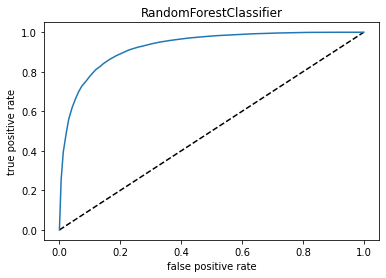

In [66]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
y_pred_prob=rf.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='RandomForestCassifier')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('RandomForestClassifier')
plt.show()

### Hyperparameter Tunning

- Doing GridSearchCV for getting best parameters for RandomforestClassifier()

In [67]:
#creating parameter list to pass in GridSearchCV
parameters= {'criterion': ['gini', 'entropy'],
             'max_features': ['auto', 'sqrt', 'log2'],
             'class_weight': ['balanced', 'balanced_subsample'],}

In [68]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5)

In [69]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'class_weight': ['balanced', 'balanced_subsample'],
                         'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2']})

In [70]:
#getting the best parameters found by GridSearchCV
GCV.best_params_

{'class_weight': 'balanced', 'criterion': 'entropy', 'max_features': 'sqrt'}

In [71]:
GCV_pred=GCV.best_estimator_.predict(x_test)

In [72]:
accuracy_score(GCV_pred,y_test)

0.9234476013263675

In [73]:
joblib.dump(GCV.best_estimator_,'Micro_credit_defaulter.obj')

['Micro_credit_defaulter.obj']